# Digit Classification using Support Vector Machine (SVM)

This project demonstrates the use of Support Vector Machines (SVM) for classifying handwritten digits from the popular `digits` dataset available in `scikit-learn`.

## Project Overview

The goal of this project is to predict which digit (0-9) is represented by a given image of a handwritten digit. We will use various SVM models with different kernels to classify the digits and compare their performance.

## 1. Importing Libraries and Dataset



In [2]:
import numpy as np
from sklearn.datasets import load_digits

##2. Loading the Dataset
We load the `digits` dataset from `scikit-learn`:

In [46]:
dataset = load_digits()

# Display the keys of the dataset to understand its structure
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

##3. Exploring the Dataset
We can explore the dataset by printing the data, target, and shapes:

In [47]:
print(dataset.data , dataset.target , dataset.data.shape , dataset.images.shape , len(dataset.images))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8] (1797, 64) (1797, 8, 8) 1797


##4. Visualizing a Digit
Let's visualize one of the digits from the dataset:



<Figure size 640x480 with 0 Axes>

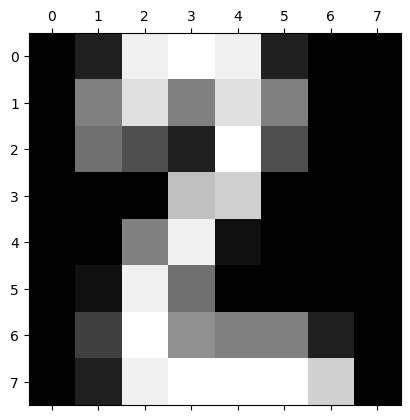

[[ 0.  2. 15. 16. 15.  2.  0.  0.]
 [ 0.  8. 14.  8. 14.  8.  0.  0.]
 [ 0.  7.  5.  2. 16.  5.  0.  0.]
 [ 0.  0.  0. 12. 13.  0.  0.  0.]
 [ 0.  0.  8. 15.  1.  0.  0.  0.]
 [ 0.  1. 15.  7.  0.  0.  0.  0.]
 [ 0.  4. 16.  9.  8.  8.  2.  0.]
 [ 0.  2. 15. 16. 16. 16. 13.  0.]]


In [49]:
import matplotlib.pyplot as plt
n = 333
plt.gray()
plt.matshow(dataset.images[n])
plt.show()
print(dataset.images[n])




##5. Preprocessing the Data
We reshape the images into feature vectors for training the SVM model:

In [6]:
x = dataset.images.reshape((len(dataset.images),-1))
y = dataset.target

# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.20 , random_state=0)

##6. Training the SVM Model
We train an SVM model with the default settings:

In [7]:
from sklearn import svm

model = svm.SVC()
model.fit(x_train , y_train)

SVC()

##7. Making Predictions and Evaluating the Model
We make predictions on the test set and evaluate the model:

In [32]:
y_pred = model.predict(x_test)

# Concatenate the predicted and actual labels for comparison
output1 = np.concatenate((y_pred.reshape(len(y_pred),1 ), y_test.reshape(len(y_test),1)),1)

# Print the first 10 predictions vs actual labels
print(output1[:10])

[[2 2]
 [8 8]
 [2 2]
 [6 6]
 [6 6]
 [7 7]
 [1 1]
 [9 9]
 [8 8]
 [5 5]]


We can also visualize one of the test images along with the predicted digit:

<Figure size 640x480 with 0 Axes>

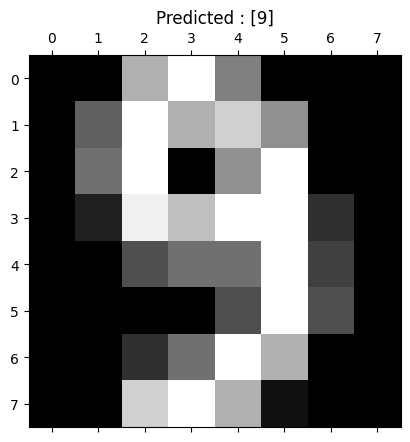

In [33]:
# import random package to generate random number
import random

 # Select a random index from the test set
n = random.randint(0,len(x_test))

# Visualize the randomly selected test image and display the predicted label
plt.gray()
plt.matshow(dataset.images[n])
tit1 = model.predict(dataset.data[n].reshape(1,-1))
plt.title(f'Predicted : {tit1}')
plt.show()



Finally, we calculate the accuracy of the model:

In [37]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test , y_pred)*100
print(f'Accuracy score : {accuracy:.2f}')

Accuracy score : 99.17


##8. Experimenting with Different SVM Kernels
We experiment with different kernels to see how they affect the model's performance:

In [45]:
# Experiment with different SVM kernels and parameters and RBF kernel with a specific gamma value
model1 = svm.SVC(kernel='linear')
model2 = svm.SVC(kernel='rbf')
model3 = svm.SVC(gamma=0.001)
model4 = svm.SVC(gamma=0.00050, C=0.1)

# Train each model on the training data
model1.fit(x_train , y_train)
model2.fit(x_train , y_train)
model3.fit(x_train , y_train)
model4.fit(x_train , y_train)

# Predict and print the accuracy score for each model on the test set
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)

print(f'Accuracy score : {accuracy_score(y_test , y_pred1)*100:.2f}')
print(f'Accuracy score : {accuracy_score(y_test , y_pred2)*100:.2f}')
print(f'Accuracy score : {accuracy_score(y_test , y_pred3)*100:.2f}')
print(f'Accuracy score : {accuracy_score(y_test , y_pred4)*100:.2f}')

Accuracy score : 97.78
Accuracy score : 99.17
Accuracy score : 99.17
Accuracy score : 96.11
